### Segurança Pública: Uma pesquisa sobre roubos e furtos no Espírito Santo e na Grande Vitória

Nos últimos anos, a segurança pública vem fazendo parte da pauta nas discussões, sejam elas em casa, no convívio social ou em esferas administrativas, e cada dia a sensação de insegurança aumenta e esse tema se faz ainda mais presente e importante. É nesse contexto que desenvolvemos esse projeto de pesquisa exploratória que visa conhecer e entender melhor o perfil de ocorrências de roubos e furtos no Espírito Santo e principalmente Grande Vitória. Nesse conjunto de dados temos acesso a informações valiosas como: data da ocorrência, hora e endereço completo. Com esse volume de informações poderemos vislumbrar melhor a dimensão desse tipo de crime em nosso estado.

Análise de Estatística Descritiva
 * definir problema de negócio
 * carregar dados
 * análise exploratória com resumo estatístico
 * tomar decisões com clareza
 * determinar variável alvo e variavel preditora
 * Regressão Linear Simples

Objetivos:

- Investigar padrões e tendências nos tipos de crimes.
- Compreender as distribuições geográficas das ocorrências.
- Desenvolver modelos preditivos para prever ou detectar crimes futuros.


Resultados Esperados:

Esperamos obter insights valiosos sobre a natureza dos crimes de roubo e furto e explorar a dispersão geográfica da mancha criminal em regiões metropolitanas e cidades menores. 


Impacto:

O projeto é destinado a todo tipo de público, princpalmente o cidadão comum, por isso tem o potencial de trazer à tona uma visão mais clara sobre esse tipo de crime, permitindo que as pessoas se apropriar desse conhecimento e tomar decisões mais acertivas sobre a sua própria segurança.


Conclusão:

Ao finalizar este projeto, esperamos não apenas aumentar nosso entendimento sobre o panorama dos crimes contra o patrimônio e crimes informáticos, mas também contribuir para o desenvolvimento de estratégias mais eficazes para lidar com esses desafios de segurança pública.




Documentação


1. Definição do Problema e Objetivos
Problema: Prevenir crimes contra o patrimônio e crimes informáticos.
Objetivos:
Identificar padrões e tendências nos tipos de crimes.
Entender a distribuição geográfica dos crimes.
Identificar os tipos de crimes mais comuns.
Desenvolver modelos para prever ou detectar crimes futuros.
2. Coleta e Exploração de Dados
Importar o DataFrame fornecido.
Realizar uma análise exploratória de dados para entender a estrutura dos dados, verificar valores ausentes, distribuição das variáveis, etc.
3. Limpeza e Pré-processamento de Dados
Tratar valores ausentes, duplicados e inconsistências.
Converter tipos de dados, se necessário.
Codificar variáveis categóricas, se aplicável.
4. Análise Exploratória de Dados (EDA)
Visualizar a distribuição dos crimes ao longo do tempo.
Analisar a distribuição geográfica dos crimes usando gráficos de mapa.
Identificar os tipos de crimes mais comuns.
Explorar possíveis relações entre variáveis.
5. Modelagem de Dados
Desenvolver modelos de aprendizado de máquina para prever ou detectar crimes.
Avaliar diferentes algoritmos e técnicas de modelagem.
Dividir os dados em conjuntos de treinamento e teste.
6. Avaliação de Modelos
Avaliar o desempenho dos modelos usando métricas apropriadas.
Ajustar hiperparâmetros para otimizar o desempenho do modelo.
7. Implantação
Implementar o modelo em um ambiente de produção, se aplicável.
Integrar o modelo aos sistemas existentes.
8. Comunicação dos Resultados
Preparar relatórios ou apresentações para comunicar os resultados e insights obtidos durante o projeto.
Recomendar ações com base nos resultados obtidos.
9. Manutenção e Monitoramento
Monitorar continuamente o desempenho do modelo em produção.
Atualizar o modelo conforme necessário com novos dados ou mudanças nos requisitos.
10. Iteração
Revisar e iterar no projeto conforme necessário para melhorar o desempenho e atender aos objetivos definidos.
Cada uma dessas etapas pode ser mais detalhada conforme avançamos no projeto e podemos aplicar técnicas mais avançadas de análise de dados e modelagem de machine learning para obter insights mais profundos e resultados mais precisos.

---

### Importação, Limpeza, Pré-processamento dos dados e distribuições das variáveis

In [2]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sea

In [3]:
#Função para Abrir, Limpar e Padronizar o Banco de Dados
df_ocorrencias = pd.read_csv('ocorrencias_2023.csv', encoding='latin1', sep=';')
df_homicidios = pd.read_csv('homicidios_2023.csv', encoding='latin1', sep=';')
df_objetos = pd.read_csv('objetos_2023.csv', encoding='latin1', sep=';')

#Função para Limpar e Padronizar o Banco de Dados
def abrir_dados():
    global dados
    dados = [df_ocorrencias, df_objetos, df_homicidios]

    def ajustes(df):
        
        if df is df_ocorrencias:
            #Renomear | Adequar os nomes das colunas
            df.rename(columns={'Nº OCORReNCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',
                                'MUNICiPIO': 'MUNICIPIO',
                                'GRUPO DE INCIDENTE': 'GRUPO DE CRIMES'}, inplace=True)

            #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)
            
            #Excluir colunas
            df.drop(columns='UF', inplace=True)

            #Padronização dos Valores
            df['GRUPO DE CRIMES'] = df['GRUPO DE CRIMES'].replace({
                    'CRIMES CONTRA PATRIMoNIO' : 'Contra Patrimônio',
                    'CRIMES DIVERSOS' : 'Diversos'
                })
            df['TIPO DE INCIDENTE'] = df['TIPO DE INCIDENTE'].replace({
                    'CRIMES CONTRA PATRIMoNIO: ESTELIONATO/FRAUDE' : 'Estelionato/Fraude',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: A PESSOA EM VIA PuBLICA' : 'Roubo: Pessoa em Via Pública',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM RESIDeNCIA/CONDOMiNIO' : 'Furto: Residência/Condomínio',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM ESTABELECIMENTO COMERCIAL' : 'Furto: Estabelecimento Comercial',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: A PESSOA EM VIA PuBLICA' : 'Furto: Pessoa em Via Pública',
                    'CRIMES DIVERSOS: CRIMES INFORMATICOS' : 'Crimes Informáticos',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM TRANSPORTE COLETIVO' : 'Roubo: Transporte Coletivo',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM TRANSPORTE COLETIVO' : 'Furto: Transporte Coletivo',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM ESTABELECIMENTO COMERCIAL' : 'Roubo: Estabelecimento Comercial',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM RESIDeNCIA/CONDOMiNIO' : 'Roubo: Residência/Condomínio'

            })
            df['TIPO DE LOCAL'] = df['TIPO DE LOCAL'].str.title()
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['LOGRADOURO'] = df['LOGRADOURO'].str.title()
            df['BAIRRO'] = df['BAIRRO'].replace({
                'Centro Vila Velha' : 'Centro',
                'Serra Centro' : 'Centro'
            })
            
            
        elif df is df_homicidios:
            #Renomear
            df.rename(columns={'Nº OCORRENCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',}, inplace=True)
            
            df['TIPO DE INCIDENTE'] = df['TIPO DE INCIDENTE'].replace({
                'CRIMES CONTRA A PESSOA: HOMICIDIO DOLOSO' : 'Homicídio Doloso'
            })
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['TIPO LOCAL'] = df['TIPO LOCAL'].str.title()

            #Excluir colunas
            df.drop(columns='UF', inplace=True)
            df.drop(columns='GRUPO DE INCIDENTE', inplace=True)

            #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)


        elif df is df_objetos:
            #Renomear
            df.rename(columns={'Nº OCORRÊNCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',}, inplace=True)
            
            df['OBJETO'] = df['OBJETO'].replace({
                'APARELHOS TELEFONICOS' : 'Aparelhos Telefônicos',
                'VEICULO' : 'Veículo',
                'BICICLETA' : 'Bicicleta'
            })
            df.rename(columns={'AÇAO ': 'AÇAO'}, inplace=True)
            df['AÇAO'] = df['AÇAO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['TIPO DE LOCAL'] = df['TIPO DE LOCAL'].str.title()
            df['LOGRADOURO'] = df['LOGRADOURO'].str.title()
            
            #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)

            #Excluir colunas
            df.drop(columns='UF', inplace=True)
            
        else:
            pass

        def arredondar_para_15minutos(hora):
            hora = pd.to_datetime(hora)
            minutos = hora.minute // 15 * 15
            return hora.replace(minute=minutos, second=0)

        df['HORA'] = df['HORA'].apply(arredondar_para_15minutos)
        df['HORA'] = df['HORA'].dt.strftime('%H:%M:%S')


    def document():
        for df in dados:
            ajustes(df)
            global ocorrencias
            global homicidios
            global objetos
            if df is df_ocorrencias:
                ocorrencias = df_ocorrencias.copy()
            elif df is df_homicidios:
                homicidios = df_homicidios.copy()
            elif df is df_objetos:
                objetos = df_objetos.copy()
            else:
                ...
    document()

In [4]:
#Função de chamada
abrir_dados()

#### Segmentação e Criação de variáveis

In [5]:
#Segmentar por roubos e furtos
ocorrencias = ocorrencias[(ocorrencias['TIPO DE INCIDENTE'] != 'Estelionato/Fraude') & (ocorrencias['TIPO DE INCIDENTE'] != 'Crimes Informáticos')]

#Segmentar por Grande Vitória
grande_vitoria = ocorrencias[(ocorrencias['MUNICIPIO'].isin(['Vitoria', 'Vila Velha', 'Serra', 'Cariacica', 'Viana', 'Guarapari', 'Fundao']))]

In [6]:
#documentação
documentacao =   """
*Dados Brutos*
df_ocorrencias = ocorrencias_2023.csv
df_homicidios = homicidios_2023.csv
df_objetos = objetos_2023.csv
------
*Dados Pré-processados e Variáveis*
ocorrencias = Dados sobre as Ocorrências
homicidios = Dados sobre os Homicídios
objetos = Dados sobre Objeto Furtados/roubados

grande_vitoria = Dados segmentados da Grande Vitória

"""
print('---DOCUMENTAÇÃO---')
print(documentacao)


---DOCUMENTAÇÃO---

*Dados Brutos*
df_ocorrencias = ocorrencias_2023.csv
df_homicidios = homicidios_2023.csv
df_objetos = objetos_2023.csv
------
*Dados Pré-processados e Variáveis*
ocorrencias = Dados sobre as Ocorrências
homicidios = Dados sobre os Homicídios
objetos = Dados sobre Objeto Furtados/roubados

grande_vitoria = Dados segmentados da Grande Vitória




---

In [7]:
objetos.sample(5)

,OCORRENCIA,DATA,HORA,OBJETO,AÇAO,MUNICIPIO,BAIRRO,LOGRADOURO,TIPO DE LOCAL
29883,52986621,26/11/2023,03:00:00,Veículo,Furtado,Cariacica,Cruzeiro Do Sul,Nao Sabe Informar,Via Publica
8389,50770700,24/03/2023,17:00:00,Aparelhos Telefônicos,Roubado,Vila Velha,Santa Rita,Rua Sebastiao Inacio Da Silva,Via Publica
15461,51441657,10/06/2023,17:00:00,Aparelhos Telefônicos,Furtado,Alegre,Centro,Praça Do Pico Da Bandeira,Via Publica
22770,52237723,04/09/2023,20:30:00,Aparelhos Telefônicos,Roubado,Serra,Jardim Limoeiro,Rod Es 010,Veiculo
32805,53319116,31/12/2023,08:15:00,Aparelhos Telefônicos,Furtado,Guarapari,Ipiranga,Rua Padre Jose De Anchieta,Outro Local


In [8]:
homicidios.sample(5)

,OCORRENCIA,DATA,HORA,TIPO DE INCIDENTE,MUNICIPIO,BAIRRO,TIPO LOCAL
370,51051743,03/05/2023,19:15:00,Homicídio Doloso,Vila Velha,Jardim Marilandia,Via Publica
636,52152022,27/08/2023,03:15:00,Homicídio Doloso,Linhares,Interlagos,Domicilio
699,52393253,23/09/2023,00:45:00,Homicídio Doloso,Serra,Vila Nova De Colares,Via Publica
930,53125950,14/12/2023,15:30:00,Homicídio Doloso,Serra,Parque Das Gaivotas,Via Publica
308,50830911,11/04/2023,10:45:00,Homicídio Doloso,Ecoporanga,Agua Branca,Domicilio


In [9]:
ocorrencias.sample(5)

,OCORRENCIA,DATA,HORA,GRUPO DE CRIMES,TIPO DE INCIDENTE,MUNICIPIO,BAIRRO,LOGRADOURO,TIPO DE LOCAL
1587,49935556,07/01/2023,00:00:00,Contra Patrimônio,Furto: Estabelecimento Comercial,Sao Mateus,Guriri,Sem Informacao,Casa De Show/Eventos
19436,50699256,28/03/2023,12:45:00,Contra Patrimônio,Roubo: Pessoa em Via Pública,Sao Mateus,Boa Vista,Rua Agenor De Souza Le,Via Publica
47607,51994271,08/08/2023,22:00:00,Contra Patrimônio,Furto: Pessoa em Via Pública,Vitoria,Centro,Sem Informacao,Via Publica
56881,52377597,20/09/2023,09:30:00,Contra Patrimônio,Furto: Estabelecimento Comercial,Guacui,Centro,Praca Joao Acacinho,Comercio
59892,52513168,03/10/2023,NaN,Contra Patrimônio,Furto: Residência/Condomínio,Cariacica,Vista Mar,Rua Cinco De Dezembro,Residencia


---

In [10]:
#Função para excluir Estelionato/Fraude da coluna TIPO DE INCIDENTE e segmentar ocorrências por Município
def visao_geral_municipio(municipio):
    
    global ocorrencias_municipio
    ocorrencias_municipio = ocorrencias[(ocorrencias['MUNICIPIO'] == municipio) & (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))]
    quantidade_ocorrencia = ocorrencias_municipio['OCORRENCIA'].nunique()
    top_bairros_mais_assalto = ocorrencias_municipio['BAIRRO'].value_counts().head(10)
    top_bairros_menos_assalto = ocorrencias_municipio['BAIRRO'].value_counts().tail(10)
    tipos_incidentes = ocorrencias_municipio['TIPO DE INCIDENTE'].value_counts().head(5)
    ocorrencias_roubo = ocorrencias_municipio[ocorrencias_municipio['TIPO DE INCIDENTE'].str.contains('Roubo')]
    contagem_roubo = ocorrencias_roubo['OCORRENCIA'].nunique()
    ocorrencias_furto = ocorrencias_municipio[ocorrencias_municipio['TIPO DE INCIDENTE'].str.contains('Furto')]
    contagem_furto = ocorrencias_furto['OCORRENCIA'].nunique()
    
    def hora(): #Função para excluir 00:00:00. Possível outlier
        global hora_incidente
        hora_incidente = ocorrencias_municipio[ocorrencias_municipio['HORA'] != '00:00:00']['HORA'].value_counts().head(5)

    hora()

    #Objetos
    objetos_municipio = objetos[objetos['MUNICIPIO'] == municipio]
    objetos_municipio_contagem = objetos_municipio['OBJETO'].value_counts()
    objetos_municipio_contagem_formatado = objetos_municipio_contagem.map('{:,.0f}'.format)

    print(f'Municipio: {municipio}')
    print('Ocorrências no município - 2023\nDados da Secretaria de Segurança Pública')
    print('')
    print('Números Ocorrências - Apenas Roubo e Furto')
    print(f'Total de ocorrências: {quantidade_ocorrencia}')
    print(f'Roubos: {contagem_roubo}')
    print(f'Furtos: {contagem_furto}')
    print('-------')
    print(f'Tipos de Incidentes:\n{tipos_incidentes}')
    print('-------')
    print(f'Bairros com maior n° de ocorrências:\n{top_bairros_mais_assalto}')
    print('-------')
    print(f'Hora do Incidente:\n{hora_incidente}')
    print('-------')
    print(f'Objetos mais roubados:\n{objetos_municipio_contagem_formatado}')


In [11]:
#Lista dos Municípios do Espírito Santo
contagem_objeto = ocorrencias['MUNICIPIO'].unique()
municipios = list(sorted(contagem_objeto))
municipios

['Afonso Claudio',
 'Agua Doce Do Norte',
 'Aguia Branca',
 'Alegre',
 'Alfredo Chaves',
 'Alto Rio Novo',
 'Anchieta',
 'Apiaca',
 'Aracruz',
 'Atilio Vivacqua',
 'Baixo Guandu',
 'Barra De Sao Francisco',
 'Boa Esperanca',
 'Bom Jesus Do Norte',
 'Brejetuba',
 'Cachoeiro De Itapemirim',
 'Cariacica',
 'Castelo',
 'Colatina',
 'Conceicao Da Barra',
 'Conceicao Do Castelo',
 'Divino De Sao Lourenco',
 'Domingos Martins',
 'Dores Do Rio Preto',
 'Ecoporanga',
 'Fundao',
 'Governador Lindenberg',
 'Guacui',
 'Guarapari',
 'Ibatiba',
 'Ibiracu',
 'Ibitirama',
 'Iconha',
 'Irupi',
 'Itaguacu',
 'Itapemirim',
 'Itarana',
 'Iuna',
 'Jaguare',
 'Jeronimo Monteiro',
 'Joao Neiva',
 'Laranja Da Terra',
 'Linhares',
 'Mantenopolis',
 'Marataizes',
 'Marechal Floriano',
 'Marilandia',
 'Mimoso Do Sul',
 'Montanha',
 'Mucurici',
 'Muniz Freire',
 'Muqui',
 'Nova Venecia',
 'Pancas',
 'Pedro Canario',
 'Pinheiros',
 'Piuma',
 'Ponto Belo',
 'Presidente Kennedy',
 'Rio Bananal',
 'Rio Novo Do Sul',


In [12]:
#Escrever o município capitalizado e sem acentos
visao_geral_municipio('Cariacica')

Municipio: Cariacica
Ocorrências no município - 2023
Dados da Secretaria de Segurança Pública

Números Ocorrências - Apenas Roubo e Furto
Total de ocorrências: 5245
Roubos: 3494
Furtos: 1751
-------
Tipos de Incidentes:
TIPO DE INCIDENTE
Roubo: Pessoa em Via Pública    3025
Furto: Pessoa em Via Pública     477
Furto: Residência/Condomínio     473
Furto: Transporte Coletivo       472
Roubo: Transporte Coletivo       355
Name: count, dtype: int64
-------
Bairros com maior n° de ocorrências:
BAIRRO
Campo Grande          987
Jardim America        301
Itaciba               198
Nova Rosa Da Penha    192
Sao Francisco         170
Vila Capixaba         162
Alto Lage             143
Cruzeiro Do Sul       136
Porto De Cariacica    101
Bandeirantes           94
Name: count, dtype: int64
-------
Hora do Incidente:
HORA
05:00:00    168
12:00:00    149
06:00:00    146
10:00:00    142
20:00:00    138
Name: count, dtype: int64
-------
Objetos mais roubados:
OBJETO
Aparelhos Telefônicos    4,075
Veícul

---

In [13]:
#Função que retorna visão geral dos roubos e furtos na Grande Vitória
def func_grande_vitoria():
 
    # global gv
    # gv = ocorrencias[(ocorrencias['MUNICIPIO'].isin(['Vitoria', 'Vila Velha', 'Serra', 'Cariacica', 'Viana'])) &
    #                              (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))]   #Segmentar Municípios de Grande Vitória e Roubos e Furtos
    
    # Indicadores Estatísticos
    gv_ocorrencias = grande_vitoria['OCORRENCIA'].nunique()
    gv_roubo = grande_vitoria[grande_vitoria['TIPO DE INCIDENTE'].str.contains('Roubo')]
    gv_roubo_contagem_unica = gv_roubo['OCORRENCIA'].nunique()
    gv_furto = grande_vitoria[grande_vitoria['TIPO DE INCIDENTE'].str.contains('Furto')]
    gv_furto_contagem_unica = gv_furto['OCORRENCIA'].nunique()

    gv_contagem_incidentes = gv_roubo['TIPO DE INCIDENTE'].value_counts().head(5)
    gv_contagem_incidentes_formtado = gv_contagem_incidentes.map('{:,.0f}'.format)

    gv_bairro_assalto = grande_vitoria[~grande_vitoria['BAIRRO'].isin(['Centro'])]
    gv_bairro_assalto_contagem = gv_bairro_assalto['BAIRRO'].value_counts().head(5)
    gv_bairro_assalto_contagem_formatado = gv_bairro_assalto_contagem.map('{:,.0f}'.format)

    gv_hora_incidente = grande_vitoria[grande_vitoria['HORA'] != '00:00:00']['HORA'].value_counts().head(5)

    print(f'Grande Vitória')
    print('Ocorrências - 2023\nDados da Secretaria de Segurança Pública')
    print('')
    print('Números Ocorrências - Apenas Roubo e Furto')
    print(f'Total de ocorrências: {gv_ocorrencias:,.0f}')
    print(f'Roubos: {gv_roubo_contagem_unica:,.0f}')
    print(f'Furtos: {gv_furto_contagem_unica:,.0f}')
    print('-------')
    print(f'{gv_contagem_incidentes_formtado}')
    print('-------')
    print(f'Bairros com maior n° de ocorrências:\n{gv_bairro_assalto_contagem_formatado}')
    print('-------')
    print(f'Hora do Incidente:\n{gv_hora_incidente}')

func_grande_vitoria()

Grande Vitória
Ocorrências - 2023
Dados da Secretaria de Segurança Pública

Números Ocorrências - Apenas Roubo e Furto
Total de ocorrências: 26,008
Roubos: 16,141
Furtos: 9,867
-------
TIPO DE INCIDENTE
Roubo: Pessoa em Via Pública        12,886
Roubo: Transporte Coletivo           2,509
Roubo: Estabelecimento Comercial       602
Roubo: Residência/Condomínio           144
Name: count, dtype: object
-------
Bairros com maior n° de ocorrências:
BAIRRO
Campo Grande                      987
Parque Residencial Laranjeiras    828
Jardim Limoeiro                   753
Carapina                          463
Jardim Camburi                    461
Name: count, dtype: object
-------
Hora do Incidente:
HORA
20:00:00    767
19:00:00    710
19:30:00    575
22:00:00    566
21:00:00    560
Name: count, dtype: int64


---

### Gráficos de Pizza

##### Gráfico com total de furtos e roubos na Grande Vitória por Município (Melhorar Visual)

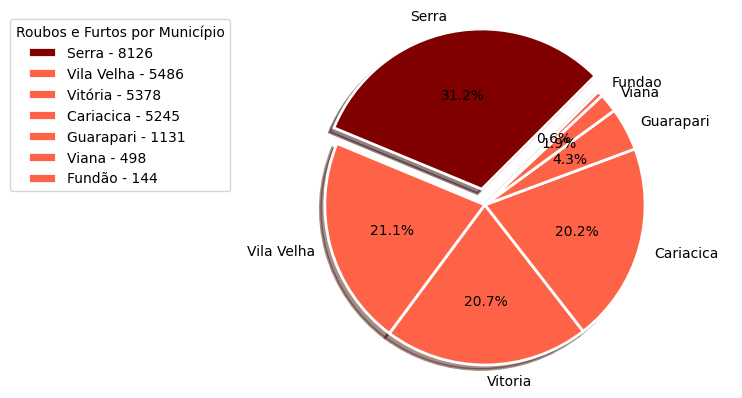

In [14]:
incidentes_por_tipo_por_municipio = grande_vitoria.groupby(['MUNICIPIO', 'TIPO DE INCIDENTE']).size()
incidentes = incidentes_por_tipo_por_municipio.groupby('MUNICIPIO').sum().sort_values(ascending=False)
municipios = incidentes.sort_values(ascending=False)

name_mapping = {
    'Serra' : 'Serra - 8126      ',
    'Vila Velha': 'Vila Velha - 5486      ',
    'Vitoria' : 'Vitória - 5378      ',
    'Cariacica' : 'Cariacica - 5245      ',
    'Guarapari' : 'Guarapari - 1131      ',
    'Viana' : 'Viana - 498      ',
    'Fundao' : 'Fundão - 144      ' 
}

labels_legend = [name_mapping.get(label, label) for label in municipios.index]
colors = ['maroon' if i == 0 else 'tomato'  for i in range(len(name_mapping))]
plt.pie(municipios, labels=municipios.index, colors=colors, startangle=45, shadow=True, explode=(0.1,0,0,0,0,0,0), autopct='%1.1f%%',
        wedgeprops={"linewidth": 2, "edgecolor" : "white"})
plt.axis('equal')
plt.legend(labels_legend, title="Roubos e Furtos por Município", bbox_to_anchor=(0, 1))
plt.show()

##### Top 5 Bairros com mais ocorrências em Vitória

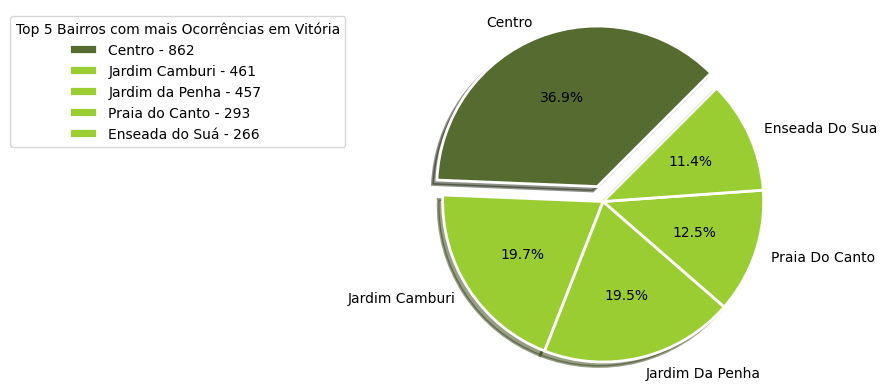

In [15]:
bairros_vitoria = ocorrencias[ocorrencias['MUNICIPIO'] == 'Vitoria']
incidentes_bairro = bairros_vitoria.groupby('BAIRRO').size().sort_values(ascending=False)

top_5_bairros_incidentes = incidentes_bairro.head(5)

bairros_mapping = {
    'Centro' : 'Centro - 862      ',
    'Jardim Camburi' : 'Jardim Camburi - 461      ',
    'Jardim Da Penha' : 'Jardim da Penha - 457     ',
    'Praia Do Canto' : 'Praia do Canto - 293      ',
    'Enseada Do Sua' : 'Enseada do Suá - 266      '
}

labels_bairros = [bairros_mapping.get(label, label) for label in top_5_bairros_incidentes.index]
colors = plt.get_cmap('tab20c')(np.linspace(0,0.2,len(labels_bairros)))
explode_colors = ['darkolivegreen' if i == 0 else 'yellowgreen' for i in range(len(labels_bairros))]
plt.pie(top_5_bairros_incidentes, labels=top_5_bairros_incidentes.index, colors=explode_colors, startangle=45, shadow=True, explode=(0.1,0,0,0,0), autopct='%1.1f%%',
        wedgeprops={"linewidth": 2, "edgecolor": "white"})
plt.axis('equal')
plt.legend(labels_bairros, title='Top 5 Bairros com mais Ocorrências em Vitória', bbox_to_anchor=(0,1))
plt.show()

##### Top 5 Tipos de Incidentes na Grande Vitória

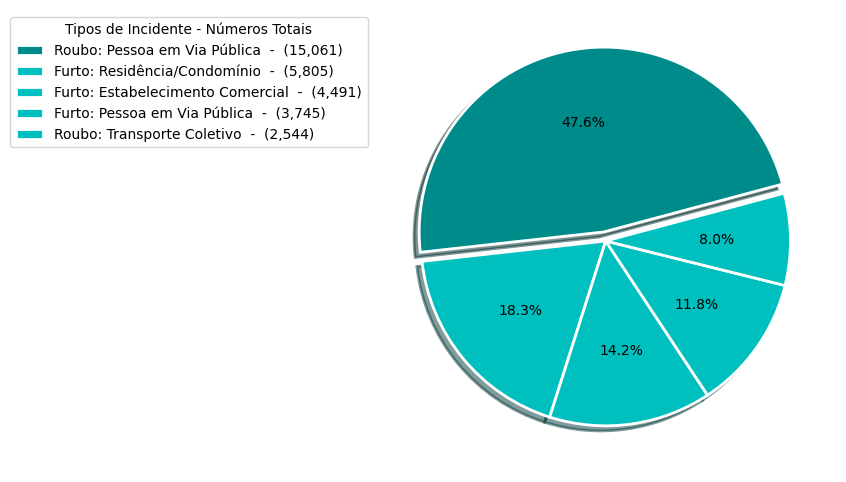

In [16]:

pieplot_ocorrencia = ocorrencias[(ocorrencias['TIPO DE INCIDENTE'] != 'Estelionato/Fraude') & (ocorrencias['TIPO DE INCIDENTE'] != 'Crimes Informáticos')]
pieplot_ocorrencia_incidente = pieplot_ocorrencia['TIPO DE INCIDENTE'].value_counts().head(5)
labels = pieplot_ocorrencia_incidente.index
colors = ['darkcyan' if i == 0 else 'c' for i in range(len(pieplot_ocorrencia_incidente))]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(pieplot_ocorrencia_incidente, colors=colors, autopct='%1.1f%%', startangle=15, explode=(0.05, 0, 0, 0 ,0), shadow=True,
                                  wedgeprops={"linewidth": 2, "edgecolor": "white"})

# Adicionar legenda
legend_labels = [f'{label}  -  ({value:,.0f})' for label, value in zip(labels, pieplot_ocorrencia_incidente)]

ax.legend(wedges, legend_labels, title="Tipos de Incidente - Números Totais", bbox_to_anchor=(0, 1))

# Ajustar proporções
ax.set(aspect="equal")

plt.show()

---

---

Criar uma query parar saber quão mais perigoso é o centro das cidades em relação aos outro bairros

---

In [17]:
vila_velha = grande_vitoria[grande_vitoria['MUNICIPIO'] == 'Vila Velha']
bairros_vila_velha = vila_velha['BAIRRO'].value_counts()
bairros_vila_velha.head(10)

BAIRRO
Praia Da Costa            348
Gloria                    324
Itapoa                    317
Centro                    279
Praia De Itaparica        276
Cobilandia                222
Coqueiral De Itaparica    212
Jockey De Itaparica       189
Sao Torquato              179
Divino Espirito Santo     170
Name: count, dtype: int64

In [18]:
cariacica = ocorrencias[ocorrencias['MUNICIPIO'] == 'Cariacica']
bairros_cariacica = cariacica['BAIRRO'].value_counts()
bairros_cariacica.head(10)

BAIRRO
Campo Grande          987
Jardim America        301
Itaciba               198
Nova Rosa Da Penha    192
Sao Francisco         170
Vila Capixaba         162
Alto Lage             143
Cruzeiro Do Sul       136
Porto De Cariacica    101
Bandeirantes           94
Name: count, dtype: int64

In [19]:
serra = grande_vitoria[grande_vitoria['MUNICIPIO'] == 'Serra']
bairros_serra = serra['BAIRRO'].value_counts()
bairros_serra.head(30)

BAIRRO
Parque Residencial Laranjeiras    828
Jardim Limoeiro                   753
Carapina                          463
Colina De Laranjeiras             242
Carapina Grande                   201
Bairro Das Laranjeiras            180
Parque Jacaraipe                  178
Novo Horizonte                    169
Valparaiso                        164
Jardim Tropical                   161
Jose De Anchieta                  154
Nova Carapina I                   154
Feu Rosa                          154
Carapina I                        153
Rosario De Fatima                 148
Andre Carloni                     141
Centro                            125
Balneario De Carapebus            124
Sao Geraldo                       123
Sao Diogo I                       112
Laranjeiras Velha                 112
Eurico Salles                     112
Porto Canoa                       111
Manoel Plaza                      102
Bairro De Fatima                  100
Outro Local                        97
Centr

In [20]:
viana = grande_vitoria[grande_vitoria['MUNICIPIO'] == 'Viana']
bairros_viana = viana['BAIRRO'].value_counts()
bairros_viana.head(10)

BAIRRO
Marcilio De Noronha         89
Vila Bethania               56
Canaa                       54
Universal                   51
Nova Bethania               46
Areinha                     26
Centro                      24
Arlindo Angelo Villaschi    20
Industrial                  19
Soteco                      16
Name: count, dtype: int64

In [21]:
guarapari = grande_vitoria[grande_vitoria['MUNICIPIO'] == 'Guarapari']
bairros_guarapari = guarapari['BAIRRO'].value_counts()
bairros_guarapari.head(10)

BAIRRO
Praia Do Morro      248
Centro              211
Muquicaba           153
Santa Monica         43
Setiba               38
Ipiranga             34
Itapebussu           32
Nova Guarapari       31
Balneario Meaipe     26
Porto Grande         25
Name: count, dtype: int64

In [22]:
fundao = grande_vitoria[grande_vitoria['MUNICIPIO'] == 'Fundao']
bairros_fundao = fundao['BAIRRO'].value_counts()
bairros_fundao.head(10)
    

BAIRRO
Praia Grande            72
Centro                  18
Zona Rural               8
Mirante Da Praia         8
Timbui                   7
Direcao                  6
Enseada Das Garcas       5
Outro Local              4
Balneario Costa Azul     3
Munitura                 2
Name: count, dtype: int64

In [23]:
#Função para monitorar bairros da Grande Vitória

def busca_bairro(bairro):
    municipios = ['Vitoria', 'Vila Velha', 'Serra', 'Viana', 'Cariacica']
    gv_bairro = grande_vitoria[grande_vitoria['MUNICIPIO'].isin(municipios)]
    gv_bairro = gv_bairro[gv_bairro['BAIRRO'] == bairro]
    contagem_bairro = gv_bairro.shape[0]
    print('------')
    print(f'Bairro: {bairro}')
    print(contagem_bairro)

busca_bairro('Jardim Camburi')

------
Bairro: Jardim Camburi
461


In [28]:
grande_vitoria_stats = grande_vitoria.select_dtypes(include=['number'])
grande_vitoria_stats.corr()

,OCORRENCIA
OCORRENCIA,1.0


In [25]:
gv = ocorrencias[(ocorrencias['MUNICIPIO'].isin(['Vitoria', 'Vila Velha', 'Serra', 'Cariacica', 'Viana'])) &
                                 (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))] 

incidentes = gv.groupby('MUNICIPIO')['TIPO DE INCIDENTE'].value_counts()
incidentes

MUNICIPIO   TIPO DE INCIDENTE               
Cariacica   Roubo: Pessoa em Via Pública        3025
            Furto: Pessoa em Via Pública         477
            Furto: Residência/Condomínio         473
            Furto: Transporte Coletivo           472
            Roubo: Transporte Coletivo           355
            Furto: Estabelecimento Comercial     329
            Roubo: Estabelecimento Comercial      87
            Roubo: Residência/Condomínio          27
Serra       Roubo: Pessoa em Via Pública        4114
            Roubo: Transporte Coletivo          1336
            Furto: Estabelecimento Comercial     806
            Furto: Pessoa em Via Pública         637
            Furto: Residência/Condomínio         582
            Furto: Transporte Coletivo           453
            Roubo: Estabelecimento Comercial     159
            Roubo: Residência/Condomínio          39
Viana       Roubo: Pessoa em Via Pública         363
            Furto: Residência/Condomínio          51
 

In [26]:
#Método Query para para segmentar pesquisas | @ é usado para referenciar uma váriavel no corpo da query
ocorrencias_centro = ocorrencias.query(
    "BAIRRO == 'Centro' & `TIPO DE INCIDENTE`!= 'Estelionato/Fraude' & `TIPO DE INCIDENTE`!= 'Crimes Informáticos'"
) #Colunas com nomes com espaços, pontuações, ou começando com dígitos precisam de backtips(``), acento crase. ex: `TIPO DE INCIDENTE`
ocorrencias_centro['MUNICIPIO'].value_counts()


MUNICIPIO
Vitoria                   862
Vila Velha                279
Linhares                  244
Guarapari                 211
Sao Mateus                188
                         ... 
Mantenopolis                3
Divino De Sao Lourenco      2
Itarana                     2
Muniz Freire                2
Mucurici                    1
Name: count, Length: 72, dtype: int64

In [27]:
gv = ocorrencias[(ocorrencias['MUNICIPIO'].isin(['Vitoria', 'Vila Velha', 'Serra', 'Cariacica', 'Viana'])) &
                                 (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))] 

gv[['TIPO DE INCIDENTE', 'BAIRRO', 'MUNICIPIO']].groupby(['TIPO DE INCIDENTE', 'MUNICIPIO']).agg(['count', 'max'])

BAIRRO                         
                                             count                      max
TIPO DE INCIDENTE                MUNICIPIO                                 
Furto: Estabelecimento Comercial Cariacica     329                Vista Mar
                                 Serra         806               Zona Rural
                                 Viana          19               Zona Rural
                                 Vila Velha    723       Zumbi Dos Palmares
                                 Vitoria       737               Vila Rubim
Furto: Pessoa em Via Pública     Cariacica     477            Vista Dourada
                                 Serra         637        Vista Da Serra Ii
                                 Viana          25            Vila Bethania
                                 Vila Velha    623       Zumbi Dos Palmares
                                 Vitoria       867               Vila Rubim
Furto: Residência/Condomínio     Cariacica     473               Zona Rural
                                 Serra         582               Zona Rural
                                 Viana          51            Vila Bethania
                                 Vila Velha    661       Zumbi Dos Palmares
                                 Vitoria       490               Vila Rubim
Furto: Transporte Coletivo       Cariacica     472            Vista Dourada
                                 Serra         453        Vista Da Serra Ii
                                 Viana          10                Primavera
                                 Vila Velha    273  Zona Nao Identificada I
                                 Vitoria       373               Vila Rubim
Roubo: Estabelecimento Comercial Cariacica      87           Vila Prudencio
                                 Serra         159     Vila Nova De Colares
                                 Viana          16                Universal
                                 Vila Velha    177             Vila Batista
                                 Vitoria       121               Vila Rubim
Roubo: Pessoa em Via Pública     Cariacica    3025               Zona Rural
                                 Serra        4114               Zona Rural
                                 Viana         363               Zona Rural
                                 Vila Velha   2840       Zumbi Dos Palmares
                                 Vitoria      2154               Vila Rubim
Roubo: Residência/Condomínio     Cariacica      27           Vila Prudencio
                                 Serra          39     Vila Nova De Colares
                                 Viana           1               Industrial
                                 Vila Velha     25               Santa Ines
                                 Vitoria        22              Santa Lucia
Roubo: Transporte Coletivo       Cariacica     355                Vista Mar
                                 Serra        1336        Vista Da Serra Ii
                                 Viana          13            Vila Bethania
                                 Vila Velha    164     Vinte E Tres De Maio
                                 Vitoria       614               Vila Rubim